In [2]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import glob
import warnings

import numpy as np

from astropy.table import Table

import matplotlib.pyplot as plt
from matplotlib import rcParams

warnings.filterwarnings("ignore")

plt.rc('text', usetex=True)
rcParams.update({'axes.linewidth': 1.5})
rcParams.update({'xtick.direction': 'in'})
rcParams.update({'ytick.direction': 'in'})
rcParams.update({'xtick.minor.visible': 'True'})
rcParams.update({'ytick.minor.visible': 'True'})
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '8.0'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '4.0'})
rcParams.update({'xtick.minor.width': '1.5'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '8.0'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '4.0'})
rcParams.update({'ytick.minor.width': '1.5'})
rcParams.update({'axes.titlepad': '10.0'})
rcParams.update({'font.size': 25})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Read in the data

In [6]:
data_dir = '/Users/song/data/massive/simulation/riker/tng/sum'

xy_list = glob.glob(os.path.join(data_dir, '*xy_sum.npy'))

print("# There are %d TNG massive galaxies" % len(xy_list))

# There are 296 TNG massive galaxies


In [8]:
xy_sum = [np.load(gal, allow_pickle=True) for gal in xy_list]

### Summarize all information about ex-situ fraction

* For each galaxy, we get:
    - Central or not: `cen_flag`
    - Total stellar mass: `logms`
    - Halo mass: `logm200c`
    - Total ex-situ fraction
    - Ex-situ fraction in-side 10 kpc
    - Ex-situ fraction in-side 100 kpc
    - The in-situ and ex-situ profiles

In [121]:
def exsitu_frac_sum(gal):
    """Summarize the ex-situ fraction of a galaxy."""
    summary = {}
    
    # Central flag
    summary['cen'] = gal['info']['cen_flag']
    # Total stellar mass
    summary['logms'] = gal['info']['logms']
    # Total halo mass
    summary['logmh'] = gal['info']['logm200c']
    
    # Total ex-situ fraction
    summary['fexs_tot'] = (10.0 ** gal['info']['logms_map_exs'] / 10.0 ** gal['info']['logms_map_gal'])
    
    # 5kpc, 10kpc, 100kpc stellar mass
    summary['logms_5'] = np.log10(gal['aper']['maper_gal'][7])
    summary['logms_10'] = np.log10(gal['aper']['maper_gal'][9])
    summary['logms_100'] = np.log10(gal['aper']['maper_gal'][16])
    
    # Mass fraction in 5 and 10 kpc
    summary['fmass_5'] = gal['aper']['maper_gal'][7] / gal['aper']['maper_gal'][16]
    summary['fmass_10'] = gal['aper']['maper_gal'][9] / gal['aper']['maper_gal'][16]
    
    # Ex-situ fraction within 5, 10, 100 kpc 
    summary['fexs_5'] = gal['aper']['maper_exs'][7] / gal['aper']['maper_gal'][7]
    summary['fexs_10'] = gal['aper']['maper_exs'][9] / gal['aper']['maper_gal'][9]
    summary['fexs_100'] = gal['aper']['maper_exs'][9] / gal['aper']['maper_gal'][9]
    
    # In-situ and ex-situ mass profile
    summary['rad'] = gal['aper']['rad_mid']
    summary['mprof_ins'] = gal['aper']['mprof_ins']
    summary['mprof_exs'] = gal['aper']['mprof_exs']
    
    return summary

In [122]:
exsitu_sum = Table([exsitu_frac_sum(gal) for gal in xy_sum])

In [123]:
exsitu_cen = exsitu_sum[exsitu_sum['cen']]

exsitu_use = exsitu_cen[exsitu_cen['logms'] >= 11.4]

print(len(exsitu_use), len(exsitu_cen), len(exsitu_sum))

118 235 296


### Making figures

In [93]:
exsitu_use['logmh'].min()

12.599107876631624

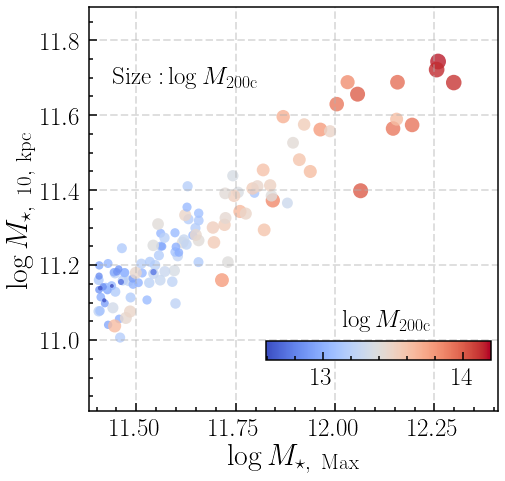

In [98]:
fig_1 = plt.figure(figsize=(6.5, 6.5))
fig_1.subplots_adjust(left=0.12, right=0.995, bottom=0.13, 
                      top=0.995, wspace=0.00, hspace=0.00)
ax1 = fig_1.add_subplot(111)

ax1.grid(linestyle='--', linewidth=2, alpha=0.4, zorder=0)

SC = ax1.scatter(
    exsitu_use['logms'], exsitu_use['logms_10'], 
    s=(exsitu_use['logmh'] - 12.50) * 150, alpha=0.8, 
    c=exsitu_use['logmh'], edgecolor='none', cmap='coolwarm')

# Colorbar
cax = fig_1.add_axes([0.50, 0.24, 0.48, 0.04])
cbar = plt.colorbar(SC, cax=cax, orientation='horizontal')
cbar.solids.set_edgecolor("face")

ax1.text(0.06, 0.80, r'${\rm Size:}\log M_{200 \rm c} $', transform=ax1.transAxes, size=25)
ax1.text(0.62, 0.20, r'$\log M_{200 \rm c} $', transform=ax1.transAxes, size=25)

_ = ax1.set_xlim(11.38, 12.41)
_ = ax1.set_ylim(10.81, 11.89)

_ = ax1.set_xlabel(r'$\log M_{\star,\ \mathrm{Max}}$', fontsize=30)
_ = ax1.set_ylabel(r'$\log M_{\star,\ \mathrm{10,\ kpc}}$', fontsize=30)

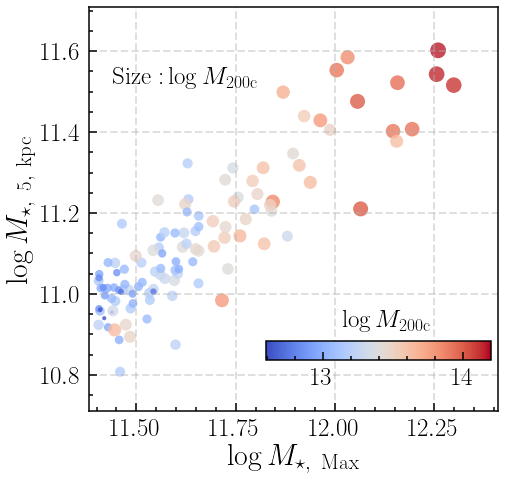

In [100]:
fig_1 = plt.figure(figsize=(6.5, 6.5))
fig_1.subplots_adjust(left=0.12, right=0.995, bottom=0.13, 
                      top=0.995, wspace=0.00, hspace=0.00)
ax1 = fig_1.add_subplot(111)

ax1.grid(linestyle='--', linewidth=2, alpha=0.4, zorder=0)

SC = ax1.scatter(
    exsitu_use['logms'], exsitu_use['logms_5'], 
    s=(exsitu_use['logmh'] - 12.50) * 150, alpha=0.8, 
    c=exsitu_use['logmh'], edgecolor='none', cmap='coolwarm')

# Colorbar
cax = fig_1.add_axes([0.50, 0.24, 0.48, 0.04])
cbar = plt.colorbar(SC, cax=cax, orientation='horizontal')
cbar.solids.set_edgecolor("face")

ax1.text(0.06, 0.80, r'${\rm Size:}\log M_{200 \rm c} $', transform=ax1.transAxes, size=25)
ax1.text(0.62, 0.20, r'$\log M_{200 \rm c} $', transform=ax1.transAxes, size=25)

_ = ax1.set_xlim(11.38, 12.41)
_ = ax1.set_ylim(10.71, 11.71)

_ = ax1.set_xlabel(r'$\log M_{\star,\ \mathrm{Max}}$', fontsize=30)
_ = ax1.set_ylabel(r'$\log M_{\star,\ \mathrm{5,\ kpc}}$', fontsize=30)

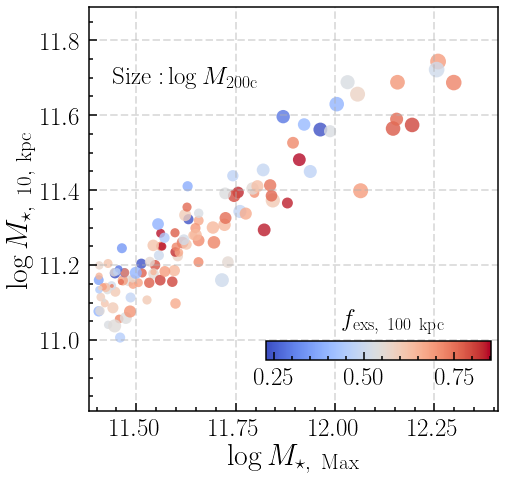

In [104]:
fig_1 = plt.figure(figsize=(6.5, 6.5))
fig_1.subplots_adjust(left=0.12, right=0.995, bottom=0.13, 
                      top=0.995, wspace=0.00, hspace=0.00)
ax1 = fig_1.add_subplot(111)

ax1.grid(linestyle='--', linewidth=2, alpha=0.4, zorder=0)

SC = ax1.scatter(
    exsitu_use['logms'], exsitu_use['logms_10'], 
    s=(exsitu_use['logmh'] - 12.50) * 150, alpha=0.8, 
    c=exsitu_use['fexs_100'], edgecolor='none', cmap='coolwarm')

# Colorbar
cax = fig_1.add_axes([0.50, 0.24, 0.48, 0.04])
cbar = plt.colorbar(SC, cax=cax, orientation='horizontal')
cbar.solids.set_edgecolor("face")

ax1.text(0.06, 0.80, r'${\rm Size:}\log M_{200 \rm c} $', transform=ax1.transAxes, size=25)
ax1.text(0.62, 0.20, r'$f_{\rm exs,\ 100\ kpc}$', transform=ax1.transAxes, size=25)

_ = ax1.set_xlim(11.38, 12.41)
_ = ax1.set_ylim(10.81, 11.89)

_ = ax1.set_xlabel(r'$\log M_{\star,\ \mathrm{Max}}$', fontsize=30)
_ = ax1.set_ylabel(r'$\log M_{\star,\ \mathrm{10,\ kpc}}$', fontsize=30)

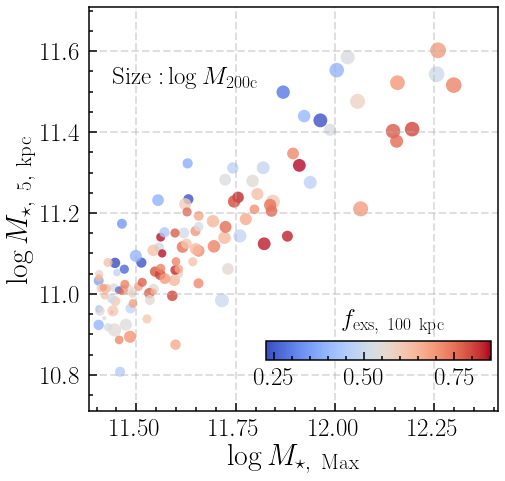

In [105]:
fig_1 = plt.figure(figsize=(6.5, 6.5))
fig_1.subplots_adjust(left=0.12, right=0.995, bottom=0.13, 
                      top=0.995, wspace=0.00, hspace=0.00)
ax1 = fig_1.add_subplot(111)

ax1.grid(linestyle='--', linewidth=2, alpha=0.4, zorder=0)

SC = ax1.scatter(
    exsitu_use['logms'], exsitu_use['logms_5'], 
    s=(exsitu_use['logmh'] - 12.50) * 150, alpha=0.8, 
    c=exsitu_use['fexs_100'], edgecolor='none', cmap='coolwarm')

# Colorbar
cax = fig_1.add_axes([0.50, 0.24, 0.48, 0.04])
cbar = plt.colorbar(SC, cax=cax, orientation='horizontal')
cbar.solids.set_edgecolor("face")

ax1.text(0.06, 0.80, r'${\rm Size:}\log M_{200 \rm c} $', transform=ax1.transAxes, size=25)
ax1.text(0.62, 0.20, r'$f_{\rm exs,\ 100\ kpc}$', transform=ax1.transAxes, size=25)

_ = ax1.set_xlim(11.38, 12.41)
_ = ax1.set_ylim(10.71, 11.71)

_ = ax1.set_xlabel(r'$\log M_{\star,\ \mathrm{Max}}$', fontsize=30)
_ = ax1.set_ylabel(r'$\log M_{\star,\ \mathrm{5,\ kpc}}$', fontsize=30)

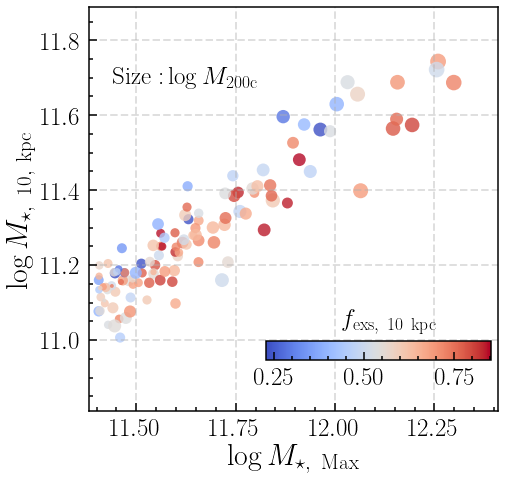

In [106]:
fig_1 = plt.figure(figsize=(6.5, 6.5))
fig_1.subplots_adjust(left=0.12, right=0.995, bottom=0.13, 
                      top=0.995, wspace=0.00, hspace=0.00)
ax1 = fig_1.add_subplot(111)

ax1.grid(linestyle='--', linewidth=2, alpha=0.4, zorder=0)

SC = ax1.scatter(
    exsitu_use['logms'], exsitu_use['logms_10'], 
    s=(exsitu_use['logmh'] - 12.50) * 150, alpha=0.8, 
    c=exsitu_use['fexs_10'], edgecolor='none', cmap='coolwarm')

# Colorbar
cax = fig_1.add_axes([0.50, 0.24, 0.48, 0.04])
cbar = plt.colorbar(SC, cax=cax, orientation='horizontal')
cbar.solids.set_edgecolor("face")

ax1.text(0.06, 0.80, r'${\rm Size:}\log M_{200 \rm c} $', transform=ax1.transAxes, size=25)
ax1.text(0.62, 0.20, r'$f_{\rm exs,\ 10\ kpc}$', transform=ax1.transAxes, size=25)

_ = ax1.set_xlim(11.38, 12.41)
_ = ax1.set_ylim(10.81, 11.89)

_ = ax1.set_xlabel(r'$\log M_{\star,\ \mathrm{Max}}$', fontsize=30)
_ = ax1.set_ylabel(r'$\log M_{\star,\ \mathrm{10,\ kpc}}$', fontsize=30)

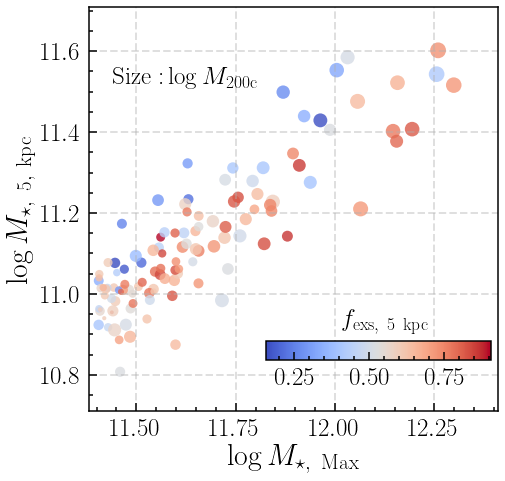

In [107]:
fig_1 = plt.figure(figsize=(6.5, 6.5))
fig_1.subplots_adjust(left=0.12, right=0.995, bottom=0.13, 
                      top=0.995, wspace=0.00, hspace=0.00)
ax1 = fig_1.add_subplot(111)

ax1.grid(linestyle='--', linewidth=2, alpha=0.4, zorder=0)

SC = ax1.scatter(
    exsitu_use['logms'], exsitu_use['logms_5'], 
    s=(exsitu_use['logmh'] - 12.50) * 150, alpha=0.8, 
    c=exsitu_use['fexs_5'], edgecolor='none', cmap='coolwarm')

# Colorbar
cax = fig_1.add_axes([0.50, 0.24, 0.48, 0.04])
cbar = plt.colorbar(SC, cax=cax, orientation='horizontal')
cbar.solids.set_edgecolor("face")

ax1.text(0.06, 0.80, r'${\rm Size:}\log M_{200 \rm c} $', transform=ax1.transAxes, size=25)
ax1.text(0.62, 0.20, r'$f_{\rm exs,\ 5\ kpc}$', transform=ax1.transAxes, size=25)

_ = ax1.set_xlim(11.38, 12.41)
_ = ax1.set_ylim(10.71, 11.71)

_ = ax1.set_xlabel(r'$\log M_{\star,\ \mathrm{Max}}$', fontsize=30)
_ = ax1.set_ylabel(r'$\log M_{\star,\ \mathrm{5,\ kpc}}$', fontsize=30)

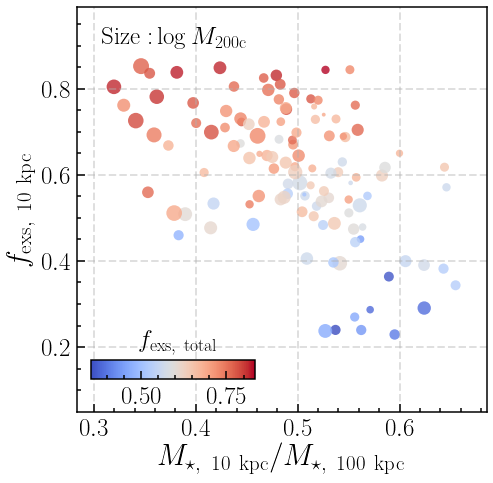

In [140]:
fig_1 = plt.figure(figsize=(6.5, 6.5))
fig_1.subplots_adjust(left=0.12, right=0.995, bottom=0.13, 
                      top=0.995, wspace=0.00, hspace=0.00)
ax1 = fig_1.add_subplot(111)

ax1.grid(linestyle='--', linewidth=2, alpha=0.4, zorder=0)

SC = ax1.scatter(
    exsitu_use['fmass_10'], exsitu_use['fexs_10'], 
    s=(exsitu_use['logmh'] - 12.50) * 150, alpha=0.8, 
    c=exsitu_use['fexs_tot'], edgecolor='none', cmap='coolwarm')

# Colorbar
cax = fig_1.add_axes([0.15, 0.20, 0.35, 0.04])
cbar = plt.colorbar(SC, cax=cax, orientation='horizontal')
cbar.solids.set_edgecolor("face")

ax1.text(0.06, 0.90, r'${\rm Size:}\log M_{200 \rm c}$', transform=ax1.transAxes, size=25)
ax1.text(0.15, 0.15, r'$f_{\rm exs,\ total}$', transform=ax1.transAxes, size=25)

#_ = ax1.set_xlim(11.38, 12.41)
_ = ax1.set_ylim(0.05, 0.99)

_ = ax1.set_xlabel(r'$M_{\star,\ 10\ \rm kpc} / M_{\star,\ 100\ \rm kpc}$', fontsize=30)
_ = ax1.set_ylabel(r'$f_{\rm exs,\ 10\ kpc}$', fontsize=30)

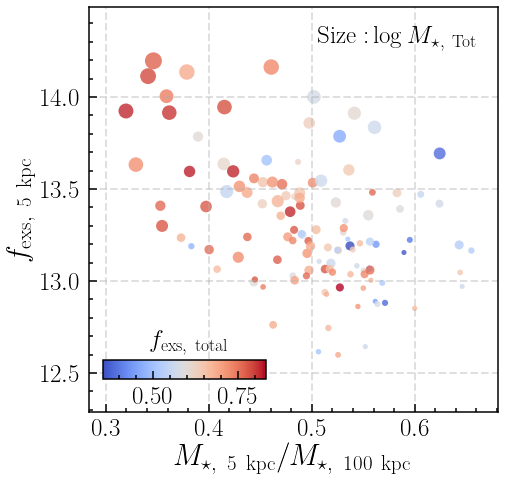

In [149]:
fig_1 = plt.figure(figsize=(6.5, 6.5))
fig_1.subplots_adjust(left=0.12, right=0.995, bottom=0.13, 
                      top=0.995, wspace=0.00, hspace=0.00)
ax1 = fig_1.add_subplot(111)

ax1.grid(linestyle='--', linewidth=2, alpha=0.4, zorder=0)

SC = ax1.scatter(
    exsitu_use['fmass_10'], exsitu_use['logmh'], 
    s=(exsitu_use['logms'] - 11.3) * 250, alpha=0.8, 
    c=exsitu_use['fexs_tot'], edgecolor='none', cmap='coolwarm')

# Colorbar
cax = fig_1.add_axes([0.15, 0.20, 0.35, 0.04])
cbar = plt.colorbar(SC, cax=cax, orientation='horizontal')
cbar.solids.set_edgecolor("face")

ax1.text(0.56, 0.90, r'${\rm Size:}\log M_{\star,\ \rm Tot}$', transform=ax1.transAxes, size=25)
ax1.text(0.15, 0.15, r'$f_{\rm exs,\ total}$', transform=ax1.transAxes, size=25)

#_ = ax1.set_xlim(11.38, 12.41)
_ = ax1.set_ylim(12.29, 14.49)

_ = ax1.set_xlabel(r'$M_{\star,\ 5\ \rm kpc} / M_{\star,\ 100\ \rm kpc}$', fontsize=30)
_ = ax1.set_ylabel(r'$f_{\rm exs,\ 5\ kpc}$', fontsize=30)

### Predict an IMF low-mass slope profile

In [169]:
def predict_imf_alpha(gal, alpha_ins=2.6, alpha_exs=1.5, 
                      normalize=False, norm_index=9):
    """Predict an observed IMF low-mass slope profile."""
    alpha_prof = (
        (gal['mprof_ins'] * alpha_ins + gal['mprof_exs'] * alpha_exs) / 
        (gal['mprof_ins'] + gal['mprof_exs'])
    )
    
    if normalize:
        alpha_prof /= alpha_prof[9]
        
    return alpha_prof

In [183]:
exsitu_low = exsitu_use[exsitu_use['fmass_10'] > 0.58]
exsitu_upp = exsitu_use[exsitu_use['fmass_10'] < 0.38]

print(len(exsitu_low), len(exsitu_upp))

12 10


In [189]:
exsitu_low_alpha = np.median([predict_imf_alpha(gal) for gal in exsitu_low], axis=0)
exsitu_upp_alpha = np.median([predict_imf_alpha(gal) for gal in exsitu_upp], axis=0)

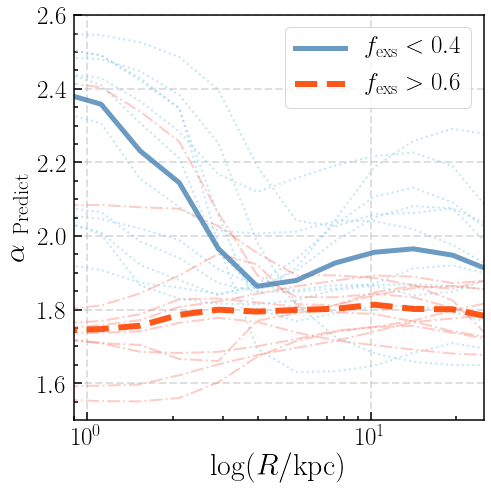

In [197]:
fig_1 = plt.figure(figsize=(6.5, 6.5))
fig_1.subplots_adjust(left=0.12, right=0.995, bottom=0.13, 
                      top=0.995, wspace=0.00, hspace=0.00)
ax1 = fig_1.add_subplot(111)

ax1.grid(linestyle='--', linewidth=2, alpha=0.4, zorder=0)

ax1.set_xscale('log')

for gal in exsitu_low:
    ax1.plot(gal['rad'], predict_imf_alpha(gal), alpha=0.5, c='skyblue', 
             linewidth=2.0, linestyle=':', label='__no_label__')

for gal in exsitu_upp:
    ax1.plot(gal['rad'], predict_imf_alpha(gal), alpha=0.4, c='salmon', 
             linewidth=2.0, linestyle='-.', label='__no_label__')
    

ax1.plot(gal['rad'], exsitu_low_alpha, alpha=0.8, c='steelblue', 
         linewidth=5.0, linestyle='-', label=r'$f_{\rm exs} < 0.4$')

ax1.plot(gal['rad'], exsitu_upp_alpha, alpha=0.9, c='orangered', 
         linewidth=6.0, linestyle='--', label=r'$f_{\rm exs} > 0.6$')

ax1.legend(fontsize=25, loc='best')
    
ax1.set_xlim(0.9, 25)
    
_ = ax1.set_xlabel(r'$\log (R/\rm kpc)$', fontsize=30)
_ = ax1.set_ylabel(r'$\alpha_{\ \rm Predict}$', fontsize=30)